In [1]:
import pandas as pd
columns = ["pixel"+str(i) for i in range(10000)]
df = pd.read_csv("mapping.csv", names=["class"]+columns, dtype={'class':str, 'img':str})
df.head()

,class,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel9990,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999
0,alone,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
1,alone,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
2,alone,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
3,alone,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
4,alone,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109


In [2]:
from sklearn import preprocessing
import numpy as np
from keras.utils import np_utils

n = df.shape[0]
nb_classes = df["class"].nunique()

le = preprocessing.LabelEncoder()
classes = df["class"]
le.fit(classes)
df["class"] = le.transform(classes)

X = df.iloc[:, 1:] # everything but the class
X /= 255 # normalization

y = df["class"]
y = np_utils.to_categorical(y, nb_classes) #one hot encodings

Using TensorFlow backend.


In [3]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel9990,pixel9991,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999
0,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451
1,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451
2,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451
3,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451
4,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451


In [4]:
from collections import Counter
Counter(le.inverse_transform(df["class"]))

Counter({'alone': 84, 'twenty': 43, 'lonely': 42})

# Next we'll do some processing shit.
# First logistic regression.

In [5]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
output_dim = nb_classes
input_dim = 100*100
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 30003     
Total params: 30,003
Trainable params: 30,003
Non-trainable params: 0
_________________________________________________________________


In [6]:
from sklearn.model_selection import train_test_split
batch_size = 128 
nb_epoch = 80

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,verbose=2, validation_data=(X_test, y_test)) 
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

y_pred = model.predict(X_test)

Instructions for updating:
Use tf.cast instead.
Train on 135 samples, validate on 34 samples
Epoch 1/80
 - 0s - loss: 1.2868 - acc: 0.2815 - val_loss: 2.2724 - val_acc: 0.5000
Epoch 2/80
 - 0s - loss: 2.4146 - acc: 0.4963 - val_loss: 1.3567 - val_acc: 0.2353
Epoch 3/80
 - 0s - loss: 1.2933 - acc: 0.2593 - val_loss: 1.3795 - val_acc: 0.2647
Epoch 4/80
 - 0s - loss: 1.3279 - acc: 0.2741 - val_loss: 1.3817 - val_acc: 0.5000
Epoch 5/80
 - 0s - loss: 1.4844 - acc: 0.4963 - val_loss: 1.3225 - val_acc: 0.5000
Epoch 6/80
 - 0s - loss: 1.3579 - acc: 0.5037 - val_loss: 1.4121 - val_acc: 0.2353
Epoch 7/80
 - 0s - loss: 1.3488 - acc: 0.2815 - val_loss: 0.9727 - val_acc: 0.5000
Epoch 8/80
 - 0s - loss: 0.9973 - acc: 0.4963 - val_loss: 1.2016 - val_acc: 0.2647
Epoch 9/80
 - 0s - loss: 1.2203 - acc: 0.4222 - val_loss: 0.9804 - val_acc: 0.5588
Epoch 10/80
 - 0s - loss: 0.9516 - acc: 0.5704 - val_loss: 1.0623 - val_acc: 0.5588
Epoch 11/80
 - 0s - loss: 1.0381 - acc: 0.6444 - val_loss: 1.3608 - val_acc:

In [7]:
from sklearn.metrics import confusion_matrix

y_test_one = y_test.argmax(axis=1)
y_pred_one = y_pred.argmax(axis=1)

confusion_matrix(y_test_one, y_pred_one)
# a confusion matrix is such that Cij is equal to the number of observations known to be in group i but predicted to be in group j.

array([[16,  1,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

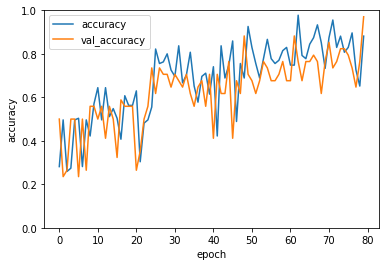

In [11]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.legend(loc="upper left")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, nb_epoch+1, 10));

In [18]:
test_y = model.predict(X.loc[0].values)
y_class = test_y.argmax(axis=1)

ValueError: Error when checking input: expected dense_1_input to have shape (10000,) but got array with shape (1,)